# Simple Jumper in the ideal situation

## Paths

The following cell draws one path of the Simple Jumper.
About 20 secs for $N=10^6$.
It is modelled on Python/CUSUM/AWS_linux.py.

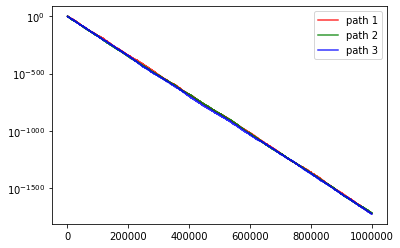

Time elapsed: 51.356404542922974


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# The key parameters: the 5 below plus Ncal (line 16)
rg = np.random.default_rng(0)     # key parameter; setting the seed for reproducibility [default 0]
Jrate = 0.01   # the jumping rate; default: 0.01
K = 3          # how many paths to draw
N = 10**6      # the number of observations
reset_interval = 10000  # occasional reset to avoid capital undeflow

# The linear calibrator:
def lin_cal(p,a):
  return 1 + a*(p-0.5)

# My family of calibrators:
Ncal = 3  # the number of calibrators; default 3
def my_cal(p,k):
  if k==0:
    return lin_cal(p,1)
  if k==1:
    return lin_cal(p,-1)
  if k==2:
    return lin_cal(p,0)
  else:
    print("my_cal failure")

import time
start = time.time()

log_Ville = np.empty(N)    # the path of the log capital
my_colors = ['r','g','b']
labels = ['path 1','path 2','path 3']

MartCap = np.empty(Ncal)  # the total capital of martingales in each state
for k in range(3):
  accumulated = 0           # accumulated shortfall (on the log scale)
  MartCap[:] = 1/Ncal       # the uniform initial distribution
  Capital = np.sum(MartCap) # the total capital (1)
  # generating the dataset:
  p = rg.random(N)
  for n in range(N):  # going through the observations
    # Jump mixing starts
    MartCap[:] = (1-Jrate)*MartCap[:] + (Jrate/Ncal)*Capital
    # Jump mixing ends
    for kk in range(Ncal):
      MartCap[kk] = MartCap[kk] * my_cal(p[n],kk)
    Capital = np.sum(MartCap)
    log_Ville[n] = np.log10(Capital) + accumulated
    # to avoid underflow:
    if n%reset_interval == 0:
      MartCap[:] = MartCap[:] / Capital
      accumulated += np.log10(Capital)
      Capital = 1
  # drawing the trajectory:
  plt.plot(log_Ville,c=my_colors[k],label=labels[k],alpha=0.8)

plt.yticks(ticks=[0,-500,-1000,-1500],labels=[r'$10^0$',r'$10^{-500}$',r'$10^{-1000}$',r'$10^{-1500}$'])
plt.legend(loc=1)  # upper right
plt.savefig("Ville_N=10^"+str(int(np.log10(N)))+"_paths.pdf", bbox_inches='tight')
plt.show()

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

## Equation

In [15]:
import numpy as np
# the left-hand side:
def LHS(n):
  return 4*n*10**(-0.00172*n)
# the right-hand side:
def RHS(n):
  return 100
left = 600
right = 1200
for _ in range(30):  # default: 30 (accuracy more than enough)
  middle = 0.5*(left+right)
  if (LHS(middle)>RHS(middle)):  # < to the left of 200, > to the right of 200
    left = middle
  else:
    right = middle
print((left+right)/2)

906.6996834240854


In [7]:
n=28

In [8]:
4*n*10**(-0.00172*n)

100.24391571437828

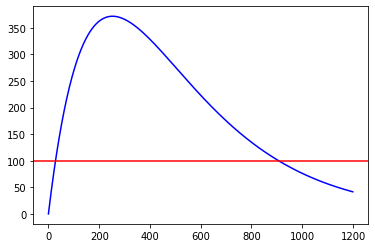

In [16]:
import matplotlib.pyplot as plt
my_range = np.arange(1200)
plt.plot(my_range,LHS(my_range),c='b')
plt.axhline(100,c='r')
plt.savefig("equation.pdf", bbox_inches='tight')
plt.show()